# EDA + Preprocesamiento.

In [75]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import r2_score
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import LeaveOneOut
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import LeaveOneOut

In [76]:
df1 = pd.read_csv("song_data.csv")
df2= pd.read_csv("song_info.csv")

In [77]:
df1 = df1.drop_duplicates(subset='song_name')
df2 = df2.drop_duplicates(subset='song_name')

In [78]:
df = pd.merge(df1, df2, on='song_name', how='inner')

In [79]:
df.describe(include = "all")

song_name  song_popularity  song_duration_ms  \
count                        13070     13070.000000      1.307000e+04   
unique                       13070              NaN               NaN   
top     Boulevard of Broken Dreams              NaN               NaN   
freq                             1              NaN               NaN   
mean                           NaN        48.487682      2.186274e+05   
std                            NaN        20.108158      6.345056e+04   
min                            NaN         0.000000      1.200000e+04   
25%                            NaN        37.000000      1.829672e+05   
50%                            NaN        51.000000      2.114860e+05   
75%                            NaN        63.000000      2.445060e+05   
max                            NaN       100.000000      1.799346e+06   

        acousticness  danceability        energy  instrumentalness  \
count   13070.000000  13070.000000  13070.000000      13070.000000   
unique           NaN           NaN           NaN               NaN   
top              NaN           NaN           NaN               NaN   
freq             NaN           NaN           NaN               NaN   
mean        0.277770      0.625010      0.635722          0.096672   
std         0.301784      0.159125      0.223985          0.246570   
min         0.000001      0.000000      0.001070          0.000000   
25%         0.025000      0.524250      0.490000          0.000000   
50%         0.147000      0.637000      0.667000          0.000022   
75%         0.479750      0.741000      0.815000          0.005910   
max         0.996000      0.987000      0.999000          0.997000   

                 key      liveness      loudness    audio_mode   speechiness  \
count   13070.000000  13070.000000  13070.000000  13070.000000  13070.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean        5.319510      0.180517     -7.790448      0.632976      0.100839   
std         3.583933      0.145377      4.110762      0.482011      0.105197   
min         0.000000      0.011900    -38.768000      0.000000      0.000000   
25%         2.000000      0.093300     -9.537250      0.000000      0.037300   
50%         5.000000      0.121000     -6.859500      1.000000      0.054400   
75%         8.000000      0.223000     -5.041250      1.000000      0.115000   
max        11.000000      0.986000      1.585000      1.000000      0.941000   

               tempo  time_signature  audio_valence artist_name  \
count   13070.000000    13070.000000   13070.000000       13070   
unique           NaN             NaN            NaN        7208   
top              NaN             NaN            NaN   Lady Gaga   
freq             NaN             NaN            NaN          41   
mean      121.151915        3.951568       0.528564         NaN   
std        29.105418        0.319291       0.248652         NaN   
min         0.000000        0.000000       0.000000         NaN   
25%        98.069500        4.000000       0.334000         NaN   
50%       120.025000        4.000000       0.529000         NaN   
75%       139.955750        4.000000       0.730000         NaN   
max       242.318000        5.000000       0.984000         NaN   

          album_names          playlist  
count           13070             13070  
unique          11097               297  
top     Greatest Hits  60s Rock Anthems  
freq               50               100  
mean              NaN               NaN  
std               NaN               NaN  
min               NaN               NaN  
25%               NaN               NaN  
50%               NaN               NaN  
75%               NaN               NaN  
max               NaN               NaN

In [80]:
df.shape

(13070, 18)

In [81]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13070 entries, 0 to 13069
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         13070 non-null  object 
 1   song_popularity   13070 non-null  int64  
 2   song_duration_ms  13070 non-null  int64  
 3   acousticness      13070 non-null  float64
 4   danceability      13070 non-null  float64
 5   energy            13070 non-null  float64
 6   instrumentalness  13070 non-null  float64
 7   key               13070 non-null  int64  
 8   liveness          13070 non-null  float64
 9   loudness          13070 non-null  float64
 10  audio_mode        13070 non-null  int64  
 11  speechiness       13070 non-null  float64
 12  tempo             13070 non-null  float64
 13  time_signature    13070 non-null  int64  
 14  audio_valence     13070 non-null  float64
 15  artist_name       13070 non-null  object 
 16  album_names       13070 non-null  object

In [82]:
artist_labelEncoding = LabelEncoder()
artist_labelEncoding.fit(df["artist_name"].values)
artist = artist_labelEncoding.transform(df["artist_name"].values)

In [83]:
df["artist"] = artist
df

song_name  song_popularity  song_duration_ms  \
0      Boulevard of Broken Dreams               73            262333   
1                      In The End               66            216933   
2               Seven Nation Army               76            231733   
3                      By The Way               74            216933   
4               How You Remind Me               56            223826   
...                           ...              ...               ...   
13065                  Stay Awake               55            114582   
13066              Let It Breathe               60            159645   
13067      Sudden Love (Acoustic)               23            182211   
13068           Gentle on My Mind               55            352280   
13069                    Up to Me               60            193533   

       acousticness  danceability  energy  instrumentalness  key  liveness  \
0          0.005520         0.496   0.682          0.000029    8    0.0589   
1          0.010300         0.542   0.853          0.000000    3    0.1080   
2          0.008170         0.737   0.463          0.447000    0    0.2550   
3          0.026400         0.451   0.970          0.003550    0    0.1020   
4          0.000954         0.447   0.766          0.000000   10    0.1130   
...             ...           ...     ...               ...  ...       ...   
13065      0.898000         0.370   0.136          0.000263    7    0.0999   
13066      0.893000         0.500   0.151          0.000065   11    0.1110   
13067      0.847000         0.719   0.325          0.000000    0    0.1250   
13068      0.945000         0.488   0.326          0.015700    3    0.1190   
13069      0.911000         0.640   0.381          0.000254    4    0.1040   

       loudness  audio_mode  speechiness    tempo  time_signature  \
0        -4.095           1       0.0294  167.060               4   
1        -6.407           0       0.0498  105.256               4   
2        -7.828           1       0.0792  123.881               4   
3        -4.938           1       0.1070  122.444               4   
4        -5.065           1       0.0313  172.011               4   
...         ...         ...          ...      ...             ...   
13065   -13.528           1       0.0433  146.081               4   
13066   -16.107           1       0.0348  113.969               4   
13067   -12.222           1       0.0355  130.534               4   
13068   -12.020           1       0.0328  106.063               4   
13069   -11.790           1       0.0302   91.490               4   

       audio_valence            artist_name  \
0             0.4740              Green Day   
1             0.3700            Linkin Park   
2             0.3240      The White Stripes   
3             0.1980  Red Hot Chili Peppers   
4             0.5740             Nickelback   
...              ...                    ...   
13065         0.0592                 Joseph   
13066         0.3000            Water Liars   
13067         0.2860          The Woodlands   
13068         0.3230           Robert Ellis   
13069         0.5810           Sera Cahoone   

                              album_names                   playlist  artist  
0      Greatest Hits: God's Favorite Band           00s Rock Anthems    2382  
1                           Hybrid Theory           00s Rock Anthems    3640  
2                                Elephant           00s Rock Anthems    6404  
3             By The Way (Deluxe Version)           00s Rock Anthems    5099  
4                          Silver Side Up           00s Rock Anthems    4487  
...                                   ...                        ...     ...  
13065                          Stay Awake  Your Favorite Coffeehouse    3093  
13066                         Water Liars  Your Favorite Coffeehouse    6797  
13067                  Parallels, Vol. II  Your Favorite Coffeehouse    6408  
13068                           Dear J

In [84]:
df.song_duration_ms= df.song_duration_ms.astype(float)
df.time_signature= df.time_signature.astype(float)
df.audio_mode= df.audio_mode.astype(float)

In [85]:
px.imshow(img = df[["song_popularity", "song_duration_ms", "acousticness", "danceability", "energy", "instrumentalness", "key", "liveness", "loudness", "audio_mode", "speechiness", "tempo", "time_signature", "audio_valence", "artist"]].corr()
,color_continuous_scale='Portland')

In [86]:
df_hist = df.drop("song_name", axis=1)

for col in df_hist.columns:
    fig=px.histogram(df_hist, x=col, title=f'Histograma de {col}')

    fig.show()

# Modelos Regression Machine Learning

### Train, Test

In [25]:
X = np.array(df[["song_duration_ms", "acousticness", "danceability", "energy", "instrumentalness", "key", "liveness", "loudness", "audio_mode", "speechiness", "tempo", "time_signature", "audio_valence", "artist"]])
y = np.array(df["song_popularity"])

## 1. Regresión Lineal Múltiple

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)
print(f"Conjunto de Train: {X_train.shape, X_test.shape}")
print(f"Conjunto de Test: {y_train.shape, y_test.shape}")

Conjunto de Train: ((9149, 14), (3921, 14))
Conjunto de Test: ((9149,), (3921,))


In [27]:
#Crear un modelo de regresión múltiple

regresion_lineal = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
regresion_lineal.fit(X_train, y_train)

# Encontramos los coeficientes de la recta  
print ("weights:", regresion_lineal.coef_)
print ("w_0:", regresion_lineal.intercept_)

# Hacer predicciones en el conjunto de prueba
yhat = regresion_lineal.predict(X_test)

for i, j in zip(yhat[:5], y_test[:5]):
    print(f"Predicción:{i} \tValor real:{j}")

weights: [-3.76455551e-06 -3.93514551e+00  4.77080047e+00 -8.93910607e+00
 -6.26824101e+00  4.32360702e-02 -5.47520368e+00  4.07873228e-01
  4.18965297e-01 -9.97657354e-01 -1.84884768e-02  6.09373483e-01
 -5.01075141e+00 -1.00045637e-04]
w_0: 60.34320673524634
Predicción:48.18286992386414 	Valor real:27
Predicción:48.349053734797764 	Valor real:65
Predicción:47.25530040333192 	Valor real:55
Predicción:47.668148468543045 	Valor real:35
Predicción:49.919594885262 	Valor real:87


In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)
print(f"Conjunto de Train: {X_train.shape, X_test.shape}")
print(f"Conjunto de Test: {y_train.shape, y_test.shape}")

Conjunto de Train: ((9149, 14), (3921, 14))
Conjunto de Test: ((9149,), (3921,))


In [15]:
#Crear un modelo de regresión múltiple

regresion_lineal = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
regresion_lineal.fit(X_train, y_train)

# Encontramos los coeficientes de la recta  
print ("weights:", regresion_lineal.coef_)
print ("w_0:", regresion_lineal.intercept_)

# Hacer predicciones en el conjunto de prueba
yhat = regresion_lineal.predict(X_test)

for i, j in zip(yhat[:5], y_test[:5]):
    print(f"Predicción:{i} \tValor real:{j}")

weights: [-4.37308825e-06 -3.74779214e+00  4.87278962e+00 -8.63210453e+00
 -7.23091815e+00 -3.33845873e-02 -3.05584931e+00  3.14161032e-01
  3.31793149e-01 -4.00661693e+00 -6.76996727e-03  1.13705652e+00
 -6.24558180e+00 -4.56213886e-05]
w_0: 56.89851450801649
Predicción:43.856787735574336 	Valor real:61
Predicción:48.183427671408126 	Valor real:58
Predicción:43.04803262059406 	Valor real:49
Predicción:37.548792896009466 	Valor real:20
Predicción:48.73104718935062 	Valor real:53


In [16]:
df_pred = pd.DataFrame()
df_pred["y_test"] = y_test.flatten()
df_pred["yhat"] = yhat.flatten()
df_pred["diferencia"] = round(abs((df_pred["y_test"] - df_pred["yhat"]) / df_pred["y_test"] * 100), 4)
df_pred = df_pred.sort_values("diferencia")
df_pred.head(5)

y_test       yhat  diferencia
501       52  52.006124      0.0118
2477      48  48.007506      0.0156
269       46  46.007512      0.0163
3820      46  45.991133      0.0193
318       48  47.969010      0.0646

### Metricas

In [17]:
RAE = np.sum(np.abs(np.subtract(y_test, yhat))) / np.sum(np.abs(np.subtract(y_test, np.mean(y_test))))
RSE = np.sum(np.square(np.subtract(y_test, yhat))) / np.sum(np.square(np.subtract(y_test, np.mean(y_test))))
r2_ajustada = 1 - (1 - regresion_lineal.score(X_test, y_test))*(len(y_test) - 1)/(len(y_test) - X_test.shape[1] - 1)

In [18]:
print(f"MAE:\t {mean_absolute_error(yhat, y_test)}")
print(f"MSE:\t {mean_squared_error(yhat, y_test)}")
print(f"R**2:\t {r2_score(yhat, y_test)}")
print(f"RAE:\t {RAE}")
print(f"RSE:\t {RSE}")
print(f"Adjusted R**2:\t {r2_ajustada}")

MAE:	 15.965069622714784
MSE:	 403.8830608233739
R**2:	 -46.44499211748793
RAE:	 0.9847962731655086
RSE:	 0.9776776973382749
Adjusted R**2:	 0.01881808152431197


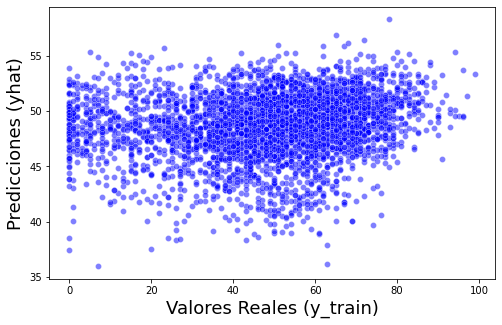

In [19]:
plt.figure(figsize = (8, 5))
sns.scatterplot(x = y_test.flatten(), y = yhat.flatten(), alpha = 0.5, color = "blue")
plt.xlabel("Valores Reales (y_train)", size = 18)
plt.ylabel("Predicciones (yhat)", size = 18)
plt.show()

## 2. Decision Trees Regressor

In [20]:
# Dividir los datos en conjunto de entrenamiento y de prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape},  y_test: {y_test.shape}")

# Ajustar el modelo de regresión de árbol de decisión
decision = DecisionTreeRegressor(random_state=42)
decision.fit(X_train, y_train)

# Hacer predicciones en el conjunto de prueba
y_pred = decision.predict(X_test)

# calcular el error
print("Mean squared error: %.2f" % np.mean((y_pred - y_test) ** 2))

X_train: (9149, 14), y_train: (9149,)
X_test: (3921, 14),  y_test: (3921,)
Mean squared error: 781.42


In [21]:
# Imprimir las predicciones y los valores reales del conjunto de prueba
print("Predicciones:", y_pred)
print("Valores reales:", y_test)

Predicciones: [75. 64. 83. ... 40. 56. 43.]
Valores reales: [ 1 70 69 ... 25 50 76]


In [22]:
df_pred = pd.DataFrame()
df_pred["y_test"] = y_test.flatten()
df_pred["y_pred"] = y_pred.flatten()
df_pred["diferencia"] = round(abs((df_pred["y_test"] - df_pred["y_pred"]) / df_pred["y_test"] * 100), 4)
df_pred = df_pred.sort_values("diferencia")
df_pred.head(5)

y_test  y_pred  diferencia
2244      46    46.0         0.0
249       60    60.0         0.0
3305      69    69.0         0.0
730       57    57.0         0.0
2416      55    55.0         0.0

### Metricas

In [23]:
r2 = r2_score(y_test, y_pred)
print("R2 score: %.2f" % r2)

R2 score: -0.92


In [24]:
RAE = np.sum(np.abs(np.subtract(y_test, y_pred))) / np.sum(np.abs(np.subtract(y_test, np.mean(y_test))))
RSE = np.sum(np.square(np.subtract(y_test, y_pred))) / np.sum(np.square(np.subtract(y_test, np.mean(y_test))))
r2_ajustada = 1 - (1 - decision.score(X_test, y_test))*(len(y_test) - 1)/(len(y_test) - X_test.shape[1] - 1)

In [25]:
print(f"MAE:\t {mean_absolute_error(y_pred, y_test)}")
print(f"MSE:\t {mean_squared_error(y_pred, y_test)}")
print(f"R**2:\t {r2_score(y_pred, y_test)}")
print(f"RAE:\t {RAE}")
print(f"RSE:\t {RSE}")
print(f"Adjusted R**2:\t {r2_ajustada}")

MAE:	 21.844172404998726
MSE:	 781.4203009436368
R**2:	 -0.8013495460058002
RAE:	 1.3566772063872004
RSE:	 1.918375775127752
Adjusted R**2:	 -0.9252516739633352


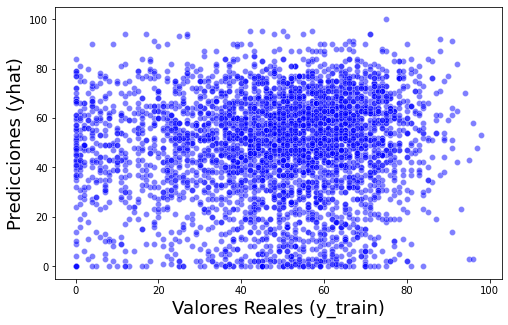

In [26]:
plt.figure(figsize = (8, 5))
sns.scatterplot(x = y_test.flatten(), y = y_pred.flatten(), alpha = 0.5, color = "blue")
plt.xlabel("Valores Reales (y_train)", size = 18)
plt.ylabel("Predicciones (yhat)", size = 18)
plt.show()

## 3. Ramdon Forest Regression

In [27]:
#Crear un modelo de regresión random forest
forest = RandomForestRegressor(max_depth = None,
                             random_state = 0,
                             n_estimators = 200,
                             n_jobs = -1)

print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape},  y_test: {y_test.shape}")


# Entrenar el modelo con los datos de entrenamiento
forest.fit(X_train, y_train)

# Hacer predicciones con los datos de prueba
y_pred = forest.predict(X_test)
print(y_pred, y_test)



X_train: (9149, 14), y_train: (9149,)
X_test: (3921, 14),  y_test: (3921,)
[46.495 48.99  57.465 ... 48.01  43.18  49.33 ] [ 1 70 69 ... 25 50 76]


In [28]:
# Imprimir las predicciones y los valores reales del conjunto de prueba
print("Predicciones:", y_pred)
print("Valores reales:", y_test)

Predicciones: [46.495 48.99  57.465 ... 48.01  43.18  49.33 ]
Valores reales: [ 1 70 69 ... 25 50 76]


In [29]:
df_pred = pd.DataFrame()
df_pred["y_test"] = y_test.flatten()
df_pred["y_pred"] = y_pred.flatten()
df_pred["diferencia"] = round(abs((df_pred["y_test"] - df_pred["y_pred"]) / df_pred["y_test"] * 100), 4)
df_pred = df_pred.sort_values("diferencia")
df_pred.head(5)

y_test  y_pred  diferencia
425       50  49.985      0.0300
764       53  52.975      0.0472
3561      53  52.975      0.0472
1323      49  48.975      0.0510
630       43  42.975      0.0581

### Métricas

In [30]:
RAE = np.sum(np.abs(np.subtract(y_test, y_pred))) / np.sum(np.abs(np.subtract(y_test, np.mean(y_test))))
RSE = np.sum(np.square(np.subtract(y_test, y_pred))) / np.sum(np.square(np.subtract(y_test, np.mean(y_test))))
r2_ajustada = 1 - (1 - forest.score(X_test, y_test))*(len(y_test) - 1)/(len(y_test) - X_test.shape[1] - 1)

In [31]:
print(f"MAE:\t {mean_absolute_error(y_pred, y_test)}")
print(f"MSE:\t {mean_squared_error(y_pred, y_test)}")
print(f"R**2:\t {r2_score(y_pred, y_test)}")
print(f"RAE:\t {RAE}")
print(f"RSE:\t {RSE}")
print(f"Adjusted R**2:\t {r2_ajustada}")

MAE:	 15.574742852892241
MSE:	 385.48616677039126
R**2:	 -9.479862311200487
RAE:	 0.9673014034180386
RSE:	 0.9463630815403081
Adjusted R**2:	 0.050244936088579606


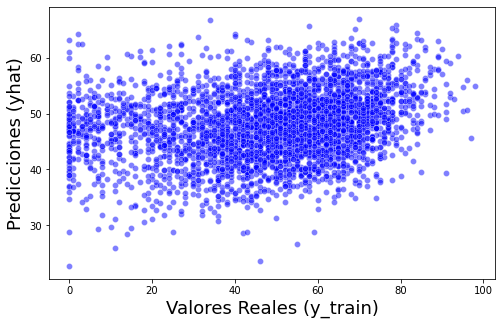

In [32]:
plt.figure(figsize = (8, 5))
sns.scatterplot(x = y_test.flatten(), y = y_pred.flatten(), alpha = 0.5, color = "blue")
plt.xlabel("Valores Reales (y_train)", size = 18)
plt.ylabel("Predicciones (yhat)", size = 18)
plt.show()

## 4. k-NN Regresion( k-Nearest Neighbors )

In [33]:
#Crear un modelo de regresión KNN con k=3 vecinos
neigh = KNeighborsRegressor(n_neighbors=3)

# Entrenar el modelo con los datos de entrenamiento
neigh.fit(X_train, y_train)

# Hacer predicciones con los datos de prueba
y_pred = neigh.predict(X_test)

In [34]:
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape},  y_test: {y_test.shape}")
print("Predicciones:", y_pred)
print("Valores reales:", y_test)

X_train: (9149, 14), y_train: (9149,)
X_test: (3921, 14),  y_test: (3921,)
Predicciones: [50.33333333 33.         59.33333333 ... 62.66666667 44.33333333
 56.33333333]
Valores reales: [ 1 70 69 ... 25 50 76]


In [35]:
df_pred = pd.DataFrame()
df_pred["y_test"] = y_test.flatten()
df_pred["y_pred"] = y_pred.flatten()
df_pred["diferencia"] = round(abs((df_pred["y_test"] - df_pred["y_pred"]) / df_pred["y_test"] * 100), 4)
df_pred = df_pred.sort_values("diferencia")
df_pred.head(5)

y_test  y_pred  diferencia
1464      33    33.0         0.0
2155      52    52.0         0.0
3103      56    56.0         0.0
2927      25    25.0         0.0
1943      52    52.0         0.0

### Metricas

In [36]:
RAE = np.sum(np.abs(np.subtract(y_test, y_pred))) / np.sum(np.abs(np.subtract(y_test, np.mean(y_test))))
RSE = np.sum(np.square(np.subtract(y_test, y_pred))) / np.sum(np.square(np.subtract(y_test, np.mean(y_test))))
r2_ajustada = 1 - (1 - neigh.score(X_test, y_test))*(len(y_test) - 1)/(len(y_test) - X_test.shape[1] - 1)

In [37]:
print(f"MAE:\t {mean_absolute_error(y_pred, y_test)}")
print(f"MSE:\t {mean_squared_error(y_pred, y_test)}")
print(f"R**2:\t {r2_score(y_pred, y_test)}")
print(f"RAE:\t {RAE}")
print(f"RSE:\t {RSE}")
print(f"Adjusted R**2:\t {r2_ajustada}")

MAE:	 18.476494091643286
MSE:	 539.5006659298931
R**2:	 -2.931322479778173
RAE:	 1.1475206257914392
RSE:	 1.3244664963725432
Adjusted R**2:	 -0.32921368811581386


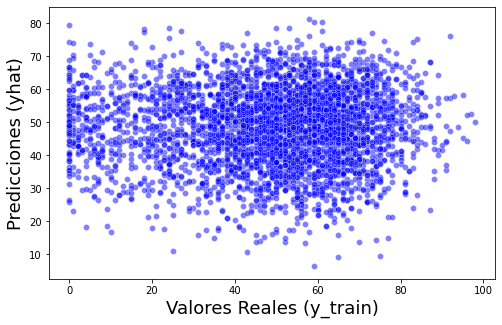

In [38]:
plt.figure(figsize = (8, 5))
sns.scatterplot(x = y_test.flatten(), y = y_pred.flatten(), alpha = 0.5, color = "blue")
plt.xlabel("Valores Reales (y_train)", size = 18)
plt.ylabel("Predicciones (yhat)", size = 18)
plt.show()

## 5. SDG regressor

In [39]:
#Crear un modelo de regresión SGD
sgd = SGDRegressor(max_iter=1000, tol=1e-3)

# Entrenar el modelo con los datos de entrenamiento
sgd.fit(X_train, y_train)

# Hacer predicciones con los datos de prueba
y_pred = sgd.predict(X_test)


In [40]:
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape},  y_test: {y_test.shape}")
print("Predicciones:", y_pred)
print("Valores reales:", y_test)

X_train: (9149, 14), y_train: (9149,)
X_test: (3921, 14),  y_test: (3921,)
Predicciones: [3.29333777e+19 2.65287799e+19 2.19356895e+19 ... 4.03332500e+19
 3.16663692e+19 3.07471308e+19]
Valores reales: [ 1 70 69 ... 25 50 76]


In [41]:
df_pred = pd.DataFrame()
df_pred["y_test"] = y_test.flatten()
df_pred["y_pred"] = y_pred.flatten()
df_pred["diferencia"] = round(abs((df_pred["y_test"] - df_pred["y_pred"]) / df_pred["y_test"] * 100), 4)
df_pred = df_pred.sort_values("diferencia")
df_pred.head(10)

y_test        y_pred    diferencia
706       37  3.661463e+18  9.895846e+18
3613      61  6.693281e+18  1.097259e+19
1311      62  7.698692e+18  1.241725e+19
2762      67  9.463950e+18  1.412530e+19
2103      51  7.299036e+18  1.431183e+19
67        52  7.627280e+18  1.466785e+19
1728      65  1.019305e+19  1.568162e+19
2492      50  8.275470e+18  1.655094e+19
2384      62  1.114917e+19  1.798253e+19
702       72  1.311721e+19  1.821834e+19

### Metricas

In [42]:
RAE = np.sum(np.abs(np.subtract(y_test, y_pred))) / np.sum(np.abs(np.subtract(y_test, np.mean(y_test))))
RSE = np.sum(np.square(np.subtract(y_test, y_pred))) / np.sum(np.square(np.subtract(y_test, np.mean(y_test))))
r2_ajustada = 1 - (1 - sgd.score(X_test, y_test))*(len(y_test) - 1)/(len(y_test) - X_test.shape[1] - 1)

In [43]:
print(f"MAE:\t {mean_absolute_error(y_pred, y_test)}")
print(f"MSE:\t {mean_squared_error(y_pred, y_test)}")
print(f"R**2:\t {r2_score(y_pred, y_test)}")
print(f"RAE:\t {RAE}")
print(f"RSE:\t {RSE}")
print(f"Adjusted R**2:\t {r2_ajustada}")

MAE:	 3.018715110193722e+19
MSE:	 9.96773878956888e+38
R**2:	 -10.656839647997367
RAE:	 1.8748350391334897e+18
RSE:	 2.4470657600805543e+36
Adjusted R**2:	 -2.455836605098764e+36


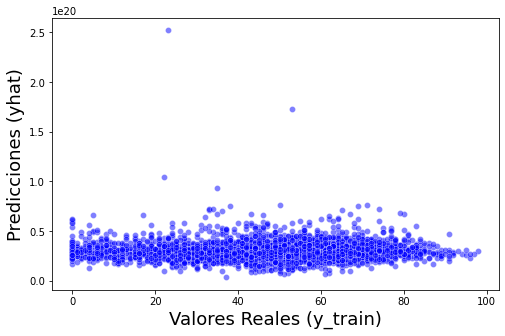

In [44]:
plt.figure(figsize = (8, 5))
sns.scatterplot(x = y_test.flatten(), y = y_pred.flatten(), alpha = 0.5, color = "blue")
plt.xlabel("Valores Reales (y_train)", size = 18)
plt.ylabel("Predicciones (yhat)", size = 18)
plt.show()

## 6. Essemble Regressor

In [45]:
#Crear un ensamblado de regresión Bagging con un modelo base de Regresión Lineal
base_estimator = LinearRegression()

# Crear un modelo de regresión Bagging
bag = BaggingRegressor(base_estimator=base_estimator, n_estimators=100, random_state=0)

# Entrenar el modelo con los datos de entrenamiento
bag.fit(X_train, y_train)

# Hacer predicciones con los datos de prueba
y_pred = bag.predict(X_test)


In [46]:
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape},  y_test: {y_test.shape}")
print("Predicciones:", y_pred)
print("Valores reales:", y_test)

X_train: (9149, 14), y_train: (9149,)
X_test: (3921, 14),  y_test: (3921,)
Predicciones: [48.37103988 50.73702038 55.2362889  ... 45.67000995 44.85094105
 46.52103606]
Valores reales: [ 1 70 69 ... 25 50 76]


In [47]:
df_pred = pd.DataFrame()
df_pred["y_test"] = y_test.flatten()
df_pred["y_pred"] = y_pred.flatten()
df_pred["diferencia"] = round(abs((df_pred["y_test"] - df_pred["y_pred"]) / df_pred["y_test"] * 100), 4)
df_pred = df_pred.sort_values("diferencia")
df_pred.head(5)

y_test     y_pred  diferencia
1753      46  45.997791      0.0048
2951      48  47.994004      0.0125
1647      49  48.993742      0.0128
555       50  50.009736      0.0195
2545      50  49.987473      0.0251

### Métricas

In [48]:
RAE = np.sum(np.abs(np.subtract(y_test, y_pred))) / np.sum(np.abs(np.subtract(y_test, np.mean(y_test))))
RSE = np.sum(np.square(np.subtract(y_test, y_pred))) / np.sum(np.square(np.subtract(y_test, np.mean(y_test))))
r2_ajustada = 1 - (1 - bag.score(X_test, y_test))*(len(y_test) - 1)/(len(y_test) - X_test.shape[1] - 1)

In [49]:
print(f"MAE:\t {mean_absolute_error(y_pred, y_test)}")
print(f"MSE:\t {mean_squared_error(y_pred, y_test)}")
print(f"R**2:\t {r2_score(y_pred, y_test)}")
print(f"RAE:\t {RAE}")
print(f"RSE:\t {RSE}")
print(f"Adjusted R**2:\t {r2_ajustada}")

MAE:	 15.917094922487504
MSE:	 398.8650660935689
R**2:	 -38.51581069562788
RAE:	 0.9885638820676346
RSE:	 0.9792080899544271
Adjusted R**2:	 0.017282203629965576


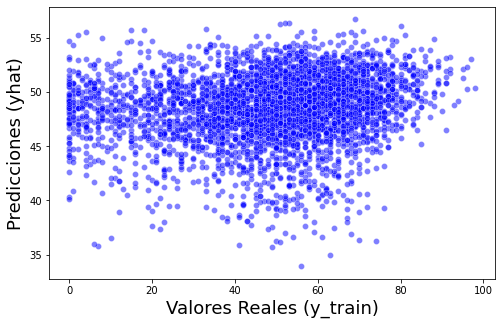

In [50]:
plt.figure(figsize = (8, 5))
sns.scatterplot(x = y_test.flatten(), y = y_pred.flatten(), alpha = 0.5, color = "blue")
plt.xlabel("Valores Reales (y_train)", size = 18)
plt.ylabel("Predicciones (yhat)", size = 18)
plt.show()

### 7.  Regression AdaBoost 

In [51]:
print(X_train.shape)
print(X_train.size)

(9149, 14)
128086


In [52]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=3767, random_state=0)

# Crear el modelo de AdaBoost
regr = AdaBoostRegressor(n_estimators=100, learning_rate=0.1, random_state=0)

# Ajustar el modelo a los datos de entrenamiento
regr.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = regr.predict(X_test)


In [53]:
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape},  y_test: {y_test.shape}")
print("Predicciones:", y_pred)
print("Valores reales:", y_test)

X_train: (9303, 14), y_train: (9303,)
X_test: (3767, 14),  y_test: (3767,)
Predicciones: [44.41593973 42.21436404 43.95045665 ... 45.04779874 48.56312057
 48.30813953]
Valores reales: [34  9 29 ... 60 57 55]


In [54]:
# Calcular el coeficiente de determinación
r2 = r2_score(y_test, y_pred)
print("Coeficiente de determinación: {:.2f}".format(r2))

Coeficiente de determinación: 0.02


In [55]:
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("X_test shape: ", X_test.shape)
print("y_test shape: ", y_test.shape)


X_train shape:  (9303, 14)
y_train shape:  (9303,)
X_test shape:  (3767, 14)
y_test shape:  (3767,)


In [56]:
df_pred = pd.DataFrame()
df_pred["y_test"] = y_test.flatten()
df_pred["y_pred"] = y_pred.flatten()
df_pred["diferencia"] = round(abs((df_pred["y_test"] - df_pred["y_pred"]) / df_pred["y_test"] * 100), 4)
df_pred = df_pred.sort_values("diferencia")
df_pred.head(5)

y_test     y_pred  diferencia
2693      43  43.007427      0.0173
568       45  44.974343      0.0570
1231      45  44.974343      0.0570
35        42  41.953081      0.1117
1603      44  43.950457      0.1126

### Métricas

In [57]:
RAE = np.sum(np.abs(np.subtract(y_test, y_pred))) / np.sum(np.abs(np.subtract(y_test, np.mean(y_test))))
RSE = np.sum(np.square(np.subtract(y_test, y_pred))) / np.sum(np.square(np.subtract(y_test, np.mean(y_test))))
r2_ajustada = 1 - (1 - regr.score(X_test, y_test))*(len(y_test) - 1)/(len(y_test) - X_test.shape[1] - 1)

In [58]:
print(f"MAE:\t {mean_absolute_error(y_pred, y_test)}")
print(f"MSE:\t {mean_squared_error(y_pred, y_test)}")
print(f"R**2:\t {r2_score(y_pred, y_test)}")
print(f"RAE:\t {RAE}")
print(f"RSE:\t {RSE}")
print(f"Adjusted R**2:\t {r2_ajustada}")

MAE:	 16.12924892346334
MSE:	 393.28475662566564
R**2:	 -36.67155614490849
RAE:	 1.0146075571530488
RSE:	 0.9789137348045902
Adjusted R**2:	 0.017433602005840432


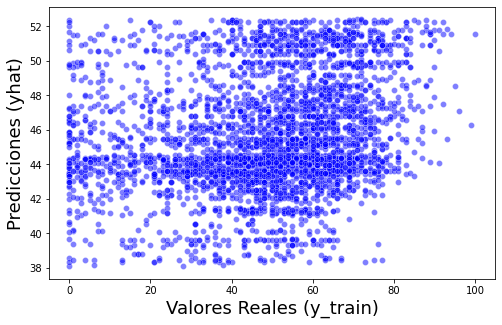

In [59]:
plt.figure(figsize = (8, 5))
sns.scatterplot(x = y_test.flatten(), y = y_pred.flatten(), alpha = 0.5, color = "blue")
plt.xlabel("Valores Reales (y_train)", size = 18)
plt.ylabel("Predicciones (yhat)", size = 18)
plt.show()

## 8. Gradient Boosting Regression 

In [60]:
# Crear el modelo de Gradient Boosting
gb = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1,
                               max_depth=1, random_state=0, loss='squared_error')

# Ajustar el modelo a los datos de entrenamiento
gb.fit(X_train, y_train)

# Realizar predicciones en el conjunto de prueba
y_pred = gb.predict(X_test)


In [61]:
# Calcular el coeficiente de determinación
r2 = r2_score(y_test, y_pred)
print("Coeficiente de determinación: {:.2f}".format(r2))

Coeficiente de determinación: 0.04


In [62]:
df_pred = pd.DataFrame()
df_pred["y_test"] = y_test.flatten()
df_pred["y_pred"] = y_pred.flatten()
df_pred["diferencia"] = round(abs((df_pred["y_test"] - df_pred["y_pred"]) / df_pred["y_test"] * 100), 4)
df_pred = df_pred.sort_values("diferencia")
df_pred.head(5)

y_test     y_pred  diferencia
1316      48  48.002197      0.0046
3574      46  46.016369      0.0356
3523      49  49.022984      0.0469
3015      50  49.974399      0.0512
3579      43  43.032286      0.0751

### Métricas 

In [63]:
RAE = np.sum(np.abs(np.subtract(y_test, y_pred))) / np.sum(np.abs(np.subtract(y_test, np.mean(y_test))))
RSE = np.sum(np.square(np.subtract(y_test, y_pred))) / np.sum(np.square(np.subtract(y_test, np.mean(y_test))))
r2_ajustada = 1 - (1 - gb.score(X_test, y_test))*(len(y_test) - 1)/(len(y_test) - X_test.shape[1] - 1)

In [64]:
print(f"MAE:\t {mean_absolute_error(y_pred, y_test)}")
print(f"MSE:\t {mean_squared_error(y_pred, y_test)}")
print(f"R**2:\t {r2_score(y_pred, y_test)}")
print(f"RAE:\t {RAE}")
print(f"RSE:\t {RSE}")
print(f"Adjusted R**2:\t {r2_ajustada}")

MAE:	 15.575575025330329
MSE:	 386.92969625125255
R**2:	 -45.369575940519674
RAE:	 0.9797787982995015
RSE:	 0.9630955374775408
Adjusted R**2:	 0.03331082245724437


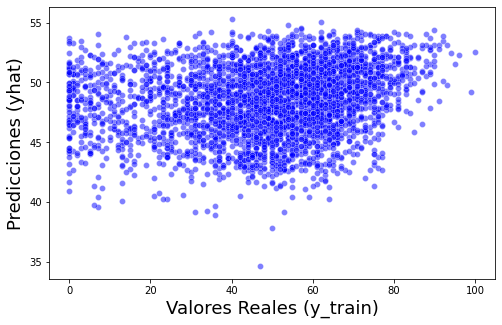

In [65]:
plt.figure(figsize = (8, 5))
sns.scatterplot(x = y_test.flatten(), y = y_pred.flatten(), alpha = 0.5, color = "blue")
plt.xlabel("Valores Reales (y_train)", size = 18)
plt.ylabel("Predicciones (yhat)", size = 18)
plt.show()

# Metodos de Validación


## Funciones de validación

In [66]:
def holdout_validation(model, X, y, iterations=100):
    mae = list()
    mse = list()
    r2 = list()
    rae = list()
    rse = list()
    adj_r2 = list()
    for i in range(iterations):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mae.append(mean_absolute_error(y_test, y_pred))
        mse.append(mean_squared_error(y_test, y_pred))
        r2.append(r2_score(y_test, y_pred))
        rae.append(np.sum(np.abs(np.subtract(y_test, y_pred))) / np.sum(np.abs(np.subtract(y_test, np.mean(y_test)))))
        rse.append(np.sum(np.square(np.subtract(y_test, y_pred))) / np.sum(np.square(np.subtract(y_test, np.mean(y_test)))))
        adj_r2.append(1 - (1-r2_score(y_test, y_pred))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1))     
    print(f'Media MAE: {np.mean(mae)}')
    print(f'Media MSE: {np.mean(mse)}')
    print(f'Media R^2: {np.mean(r2)}')
    print(f'Media RAE: {np.mean(rae)}')
    print(f'Media RSE: {np.mean(rse)}')
    print(f'Media Adjusted R^2: {np.mean(adj_r2)}')
    return

In [67]:
def loo_validation(model, X, y):
    loo = LeaveOneOut()
    mae =list()
    mse =list()
    rae =list()
    rse =list()
    for train_index, test_index in loo.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mae.append(mean_absolute_error(y_test, y_pred))
        mse.append(mean_squared_error(y_test, y_pred))
        rae.append(np.sum(np.abs(np.subtract(y_test, y_pred))) / np.sum(np.abs(np.subtract(y_test, np.mean(y_test)))))
        rse.append(np.sum(np.square(np.subtract(y_test, y_pred))) / np.sum(np.square(np.subtract(y_test, np.mean(y_test)))))
    print(f'Media MAE: {np.mean(mae)}')
    print(f'Media MSE: {np.mean(mse)}')
    print(f'Media RAE: {np.mean(rae)}')
    print(f'Media RSE: {np.mean(rse)}')
    return


In [68]:
#def loo_validation(model, X, y):
#    loo = LeaveOneOut()
 #   mae =list()
 #   mse =list()
#    rae =list()
   # rse =list()
  #  for train_index, test_index in loo.split(X):
 #       X_train, X_test = X[train_index], X[test_index]
#        y_train, y_test = y[train_index], y[test_index]
        #model.fit(X_train, y_train)
       # y_pred = model.predict(X_test)
      #  mae.append(mean_absolute_error(y_test, y_pred))
     #   mse.append(mean_squared_error(y_test, y_pred))
    #    rae.append(np.sum(np.abs(np.subtract(y_test, y_pred))) / np.sum(np.abs(np.subtract(y_test, np.nanmean(y_test)))))
   #     rse.append(np.sum(np.square(np.subtract(y_test, y_pred))) / np.sum(np.square(np.subtract(y_test, np.nanmean(y_test)))))
  #  print(f'Media MAE: {np.mean(mae)}')
 #   print(f'Media MSE: {np.mean(mse)}')
#    print(f'Media RAE: {np.nanmean(rae)}')
#    print(f'Media RSE: {np.nanmean(rse)}')
#    return

In [69]:
def k_fold_validation(model, X, y, k=5):
    kf = KFold(n_splits=k)
    mae = list()
    mse = list()
    r2 = list()
    rae = list()
    rse = list()
    adj_r2 = list()
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        mae.append(mean_absolute_error(y_test, y_pred))
        mse.append(mean_squared_error(y_test, y_pred))
        r2.append(r2_score(y_test, y_pred))
        rae.append(np.sum(np.abs(np.subtract(y_test, y_pred))) / np.sum(np.abs(np.subtract(y_test, np.mean(y_test)))))
        rse.append(np.sum(np.square(np.subtract(y_test, y_pred))) / np.sum(np.square(np.subtract(y_test, np.mean(y_test)))))
        adj_r2.append(1 - (1 - r2_score(y_test, y_pred)) * (len(y_test) - 1) / (len(y_test) - X_test.shape[1] - 1))
    print(f'Media MAE: {np.mean(mae)}')
    print(f'Media MSE: {np.mean(mse)}')
    print(f'Media R^2: {np.mean(r2)}')
    print(f'Media RAE: {np.mean(rae)}')
    print(f'Media RSE: {np.mean(rse)}')
    print(f'Media Adjusted R^2: {np.mean(adj_r2)}')
    return


### Aplicación de las funciones a los distintos métodos

* Regresion Multiple

In [70]:
print("Hold Out Validation")
holdout_validation(regresion_lineal, X, y)
print("-------")
print("k-Fold Cross Validation")
k_fold_validation(regresion_lineal,  X, y)

Hold Out Validation
Media MAE: 15.804962733978593
Media MSE: 397.4646529909555
Media R^2: 0.019261310952780802
Media RAE: 0.9897580168671657
Media RSE: 0.9807386890472192
Media Adjusted R^2: 0.013978378422322524
-------
k-Fold Cross Validation
Media MAE: 16.130564911420215
Media MSE: 411.0572382114566
Media R^2: -0.042600364226022716
Media RAE: 1.0280268692388543
Media RSE: 1.0426003642260229
Media Adjusted R^2: -0.048216526249556454


* Decision tree regressor

In [71]:
print("Hold Out Validation")
holdout_validation(decision, X, y)
print("-------")
print("k-Fold Cross Validation")
k_fold_validation(decision,  X, y)

Hold Out Validation
Media MAE: 21.726373374139243
Media MSE: 773.0345887528691
Media R^2: -0.9174695435920378
Media RAE: 1.364544191459744
Media RSE: 1.9174695435920381
Media Adjusted R^2: -0.9277983522146961
-------
k-Fold Cross Validation
Media MAE: 22.621499617444528
Media MSE: 822.2048967100229
Media R^2: -1.1009551913791196
Media RAE: 1.4461839089174604
Media RSE: 2.1009551913791196
Media Adjusted R^2: -1.1122723797897804


* Random forest regressor

In [72]:
print("Hold Out Validation")
holdout_validation(forest, X, y)
print("-------")
print("k-Fold Cross Validation")
k_fold_validation(forest,  X, y)

Hold Out Validation
Media MAE: 15.474782683505179
Media MSE: 383.2199824300097
Media R^2: 0.05378330867860729
Media RAE: 0.9695592161220735
Media RSE: 0.9462166913213927
Media Adjusted R^2: 0.04868633535098148
-------
k-Fold Cross Validation
Media MAE: 16.08523229587933
Media MSE: 407.6539384284049
Media R^2: -0.03475606389610333
Media RAE: 1.0252753866500253
Media RSE: 1.0347560638961033
Media Adjusted R^2: -0.040329971127556055


* KNN regressor

In [73]:
print("Hold Out Validation")
holdout_validation(neigh, X, y)
print("-------")
print("k-Fold Cross Validation")
k_fold_validation(neigh,  X, y)

Hold Out Validation
Media MAE: 18.481526396327464
Media MSE: 541.4555916857944
Media R^2: -0.33800104730305003
Media RAE: 1.1594634361928775
Media RSE: 1.3380010473030497
Media Adjusted R^2: -0.3452084404012581
-------
k-Fold Cross Validation
Media MAE: 18.713516959959193
Media MSE: 550.5531667091728
Media R^2: -0.3993219361137293
Media RAE: 1.1933553428618722
Media RSE: 1.3993219361137292
Media Adjusted R^2: -0.4068596456580126


* SGD regressor

In [74]:
print("Hold Out Validation")
holdout_validation(sgd, X, y)
print("-------")
print("k-Fold Cross Validation")
k_fold_validation(sgd,  X, y)

Hold Out Validation
Media MAE: 6.561469391377452e+18
Media MSE: 7.223270507291028e+37
Media R^2: -1.7758394993498855e+35
Media RAE: 4.109652682776407e+17
Media RSE: 1.7758394993498855e+35
Media Adjusted R^2: -1.7854053912278764e+35
-------
k-Fold Cross Validation
Media MAE: 8.017821427805929e+18
Media MSE: 1.0491882668870852e+38
Media R^2: -2.916169958933851e+35
Media RAE: 5.304596902890505e+17
Media RSE: 2.916169958933851e+35
Media Adjusted R^2: -2.9318784542878625e+35


* Essemble regressor

In [75]:
print("Hold Out Validation")
holdout_validation(bag, X, y)
print("-------")
print("k-Fold Cross Validation")
k_fold_validation(bag,  X, y)

Hold Out Validation
Media MAE: 15.746497124200776
Media MSE: 395.3417363237713
Media R^2: 0.02017380057592958
Media RAE: 0.98931290376123
Media RSE: 0.9798261994240705
Media Adjusted R^2: 0.01489578334163293
-------
k-Fold Cross Validation
Media MAE: 16.132321207924527
Media MSE: 411.159573593605
Media R^2: -0.042867282287579564
Media RAE: 1.0281453581759255
Media RSE: 1.0428672822875797
Media Adjusted R^2: -0.04848488211521562


* Adaboost

In [76]:
print("Hold Out Validation")
holdout_validation(regr, X, y)
print("-------")
print("k-Fold Cross Validation")
k_fold_validation(regr,  X, y)

Hold Out Validation
Media MAE: 16.193586207572142
Media MSE: 396.70185777262236
Media R^2: 0.01821699317413305
Media RAE: 1.0163397130723753
Media RSE: 0.9817830068258668
Media Adjusted R^2: 0.01292843523047698
-------
k-Fold Cross Validation
Media MAE: 16.410417022546
Media MSE: 407.0662061716986
Media R^2: -0.033679799725698324
Media RAE: 1.0457285949071347
Media RSE: 1.0336797997256983
Media Adjusted R^2: -0.03924790945873402


* Gradient Boosting

In [77]:
print("Hold Out Validation")
holdout_validation(gb, X, y)
print("-------")
print("k-Fold Cross Validation")
k_fold_validation(gb,  X, y)

Hold Out Validation
Media MAE: 15.66234700228052
Media MSE: 390.3692101147576
Media R^2: 0.03613896976004818
Media RAE: 0.9809591470751287
Media RSE: 0.963861030239952
Media Adjusted R^2: 0.030946951898039976
-------
k-Fold Cross Validation
Media MAE: 15.99206042755822
Media MSE: 404.0063839526757
Media R^2: -0.024507670803124038
Media RAE: 1.019105463969078
Media RSE: 1.024507670803124
Media Adjusted R^2: -0.030026373146811537


# GridSearchCV

In [78]:
# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

# Crear un diccionario con los modelos a evaluar
models = {
    'Linear_Regression': make_pipeline(StandardScaler(), LinearRegression()),
    'Decision_Tree': DecisionTreeRegressor(),
    'Random_Forest': RandomForestRegressor(),
    'K-NN': KNeighborsRegressor(),
    'SGD': SGDRegressor(),
    'AdaBoost': AdaBoostRegressor(),
    'Gradient_Boosting': GradientBoostingRegressor()
}

# Crear un diccionario con los parámetros a evaluar para cada modelo
param_grid = {
    'Linear_Regression': {'linearregression__fit_intercept': [True, False]},
    'Decision_Tree': {'max_depth': [2, 4, 8], 'min_samples_leaf': [2, 4, 8]},
    'Random_Forest': {'n_estimators': [10, 50, 100], 'max_depth': [2, 4, 8]},
    'K-NN': {'n_neighbors': [2, 4, 8], 'weights': ['uniform', 'distance']},
    'SGD': {'loss': ['squared_error', 'huber'], 'alpha': [0.1, 0.01, 0.001], 'max_iter': [1000, 5000, 10000]},
    'AdaBoost': {'n_estimators': [10, 50, 100], 'learning_rate': [0.1, 0.01, 0.001]},
    'Gradient_Boosting': {'n_estimators': [10, 50, 100], 'learning_rate': [0.1, 0.01, 0.001], 'max_depth': [2, 4, 8]}
}
# Iterar sobre cada modelo
for model_name, model in models.items():
    # Crear una instancia de GridSearchCV
    grid_search = GridSearchCV(model, param_grid[model_name], cv=5, scoring='neg_mean_squared_error')
    
    # Ajustar el modelo con los datos de entrenamiento
    grid_search.fit(X_train, y_train)
    
    # Imprimir los mejores parámetros encontrados
    print(f"{model_name} best params: {grid_search.best_params_}")
    
    # Utilizar los mejores parámetros para hacer predicciones
    y_pred = grid_search.predict(X_test)
    
    # Calcular el error cuadrático medio
    mse = mean_squared_error(y_test, y_pred)
    r2  = r2_score(y_test, y_pred)
    rae = np.sum(np.abs(np.subtract(y_test, y_pred))) / np.sum(np.abs(np.subtract(y_test, np.mean(y_test))))
    rse = np.sum(np.square(np.subtract(y_test, y_pred))) / np.sum(np.square(np.subtract(y_test, np.mean(y_test))))
    print(f"{model_name} MSE: {mse}")
    print(f"{model_name} R**2: {r2}")
    print(f"{model_name} RAE: {rae}")
    print(f"{model_name} RSE: {rse}")

Linear_Regression best params: {'linearregression__fit_intercept': True}
Linear_Regression MSE: 408.82472567322793
Linear_Regression R**2: 0.023359484479375636
Linear_Regression RAE: 0.9875736842923913
Linear_Regression RSE: 0.9766405155206244
Decision_Tree best params: {'max_depth': 4, 'min_samples_leaf': 8}
Decision_Tree MSE: 404.9704547354957
Decision_Tree R**2: 0.03256694410497496
Decision_Tree RAE: 0.9789206858162208
Decision_Tree RSE: 0.967433055895025
Random_Forest best params: {'max_depth': 8, 'n_estimators': 100}
Random_Forest MSE: 390.08831401586264
Random_Forest R**2: 0.06811885834044185
Random_Forest RAE: 0.9618600161587367
Random_Forest RSE: 0.9318811416595582
K-NN best params: {'n_neighbors': 8, 'weights': 'uniform'}
K-NN MSE: 467.3394283186687
K-NN R**2: -0.11642616391327398
K-NN RAE: 1.0550793160936622
K-NN RSE: 1.116426163913274


C:\Users\Usuario ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

C:\Users\Usuario ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

C:\Users\Usuario ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

C:\Users\Usuario ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:1503: ConvergenceWarning:

Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.

C:\Users\Usuario ASUS\anaconda3\lib\site-packages\sklearn\linear_model\_stochastic_gradi

SGD best params: {'alpha': 0.1, 'loss': 'huber', 'max_iter': 10000}
SGD MSE: 32591803979.913986
SGD R**2: -77858490.03983086
SGD RAE: 10556.868296991228
SGD RSE: 77858491.03983086
AdaBoost best params: {'learning_rate': 0.01, 'n_estimators': 100}
AdaBoost MSE: 402.1046025686131
AdaBoost R**2: 0.03941317223626295
AdaBoost RAE: 0.9819211082824194
AdaBoost RSE: 0.960586827763737
Gradient_Boosting best params: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 100}
Gradient_Boosting MSE: 394.0626887660373
Gradient_Boosting R**2: 0.058624482973367864
Gradient_Boosting RAE: 0.9650178812067954
Gradient_Boosting RSE: 0.9413755170266321


* Linear_Regression best params: {'linearregression__fit_intercept': True}
    * Linear_Regression MSE: 408.82472567322793
    * Linear_Regression R**2: 0.023359484479375636
    * Linear_Regression RAE: 0.9875736842923913
    * Linear_Regression RSE: 0.9766405155206244
* Decision_Tree best params: {'max_depth': 4, 'min_samples_leaf': 8}
    * Decision_Tree MSE: 404.9704547354957
    * Decision_Tree R**2: 0.03256694410497496
    * Decision_Tree RAE: 0.9789206858162208
    * Decision_Tree RSE: 0.967433055895025
* Random_Forest best params: {'max_depth': 8, 'n_estimators': 100}
    * Random_Forest MSE: 390.85943135726814
    * Random_Forest R**2: 0.06627673776762921
    * Random_Forest RAE: 0.9622389222642055
    * Random_Forest RSE: 0.9337232622323708
* K-NN best params: {'n_neighbors': 8, 'weights': 'uniform'}
    * K-NN MSE: 467.3394283186687
    * K-NN R**2: -0.11642616391327398
    * K-NN RAE: 1.0550793160936622
    * K-NN RSE: 1.116426163913274
* SGD best params: {'alpha': 0.01, 'loss': 'huber', 'max_iter': 1000}
    * SGD MSE: 212815001644.7413
    * SGD R**2: -508393302.6940906
    * SGD RAE: 26982.28541240553
    * SGD RSE: 508393303.6940906
* AdaBoost best params: {'learning_rate': 0.01, 'n_estimators': 100}
    * AdaBoost MSE: 403.3618970714061
    * AdaBoost R**2: 0.03640962407917203
    * AdaBoost RAE: 0.9839515357171972
    * AdaBoost RSE: 0.963590375920828
* Gradient_Boosting best params: {'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 50}
    * Gradient_Boosting MSE: 392.7541594267933
    * Gradient_Boosting R**2: 0.06175042592202051
    * Gradient_Boosting RAE: 0.9640960918626459
    * Gradient_Boosting RSE: 0.9382495740779795

# Mejor método : Random forest; Tunning

In [79]:
forest = RandomForestRegressor(max_depth = 8,
                             random_state = 0,
                             n_estimators = 100,
                             n_jobs = -1)

print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape},  y_test: {y_test.shape}")

forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)
print(y_pred, y_test)


X_train: (10456, 14), y_train: (10456,)
X_test: (2614, 14),  y_test: (2614,)
[49.6903404  52.44656731 57.74727146 ... 45.40981402 46.33987624
 47.58831431] [ 1 70 69 ... 42 46 59]


In [80]:
print("Predicciones:", y_pred)
print("Valores reales:", y_test)

Predicciones: [49.6903404  52.44656731 57.74727146 ... 45.40981402 46.33987624
 47.58831431]
Valores reales: [ 1 70 69 ... 42 46 59]


In [81]:
df_pred = pd.DataFrame()
df_pred["y_test"] = y_test.flatten()
df_pred["y_pred"] = y_pred.flatten()
df_pred["diferencia"] = round(abs((df_pred["y_test"] - df_pred["y_pred"]) / df_pred["y_test"] * 100), 4)
df_pred = df_pred.sort_values("diferencia")
df_pred.head(5)

y_test     y_pred  diferencia
1931      49  48.990738      0.0189
749       49  48.976316      0.0483
2271      51  51.034836      0.0683
2231      49  48.951079      0.0998
742       54  54.056012      0.1037

## Métricas

In [82]:
RAE = np.sum(np.abs(np.subtract(y_test, y_pred))) / np.sum(np.abs(np.subtract(y_test, np.mean(y_test))))
RSE = np.sum(np.square(np.subtract(y_test, y_pred))) / np.sum(np.square(np.subtract(y_test, np.mean(y_test))))
r2_ajustada = 1 - (1 - gb.score(X_test, y_test))*(len(y_test) - 1)/(len(y_test) - X_test.shape[1] - 1)

In [83]:
print(f"MAE:\t {mean_absolute_error(y_pred, y_test)}")
print(f"MSE:\t {mean_squared_error(y_pred, y_test)}")
print(f"R**2:\t {r2_score(y_pred, y_test)}")
print(f"RAE:\t {RAE}")
print(f"RSE:\t {RSE}")
print(f"Adjusted R**2:\t {r2_ajustada}")

MAE:	 15.687277205564685
MSE:	 390.3273249782513
R**2:	 -16.76423498142808
RAE:	 0.9604900654728195
RSE:	 0.9324521144380219
Adjusted R**2:	 0.033552760836860096


## Visualizaciones

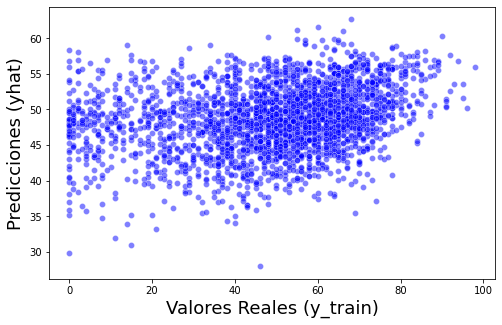

In [84]:
plt.figure(figsize = (8, 5))
sns.scatterplot(x = y_test.flatten(), y = y_pred.flatten(), alpha = 0.5, color = "blue")
plt.xlabel("Valores Reales (y_train)", size = 18)
plt.ylabel("Predicciones (yhat)", size = 18)
plt.show()

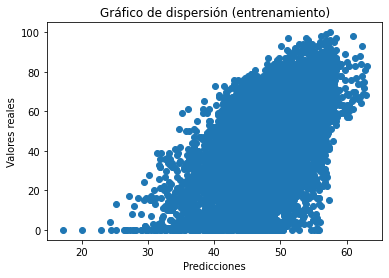

In [85]:
#Gráfico de dispersión:
import matplotlib.pyplot as plt

y_pred_train = forest.predict(X_train)

plt.scatter(y_pred_train, y_train)
plt.xlabel("Predicciones")
plt.ylabel("Valores reales")
plt.title("Gráfico de dispersión (entrenamiento)")
plt.show()


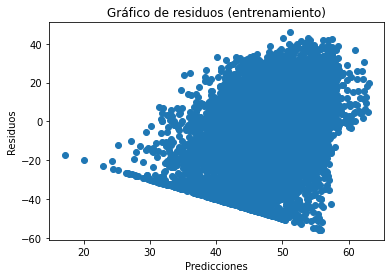

In [90]:
#Gráfico de residuos:

residuos = y_train - y_pred_train

plt.scatter(y_pred_train, residuos)
plt.xlabel("Predicciones")
plt.ylabel("Residuos")
plt.title("Gráfico de residuos (entrenamiento)")
plt.show()


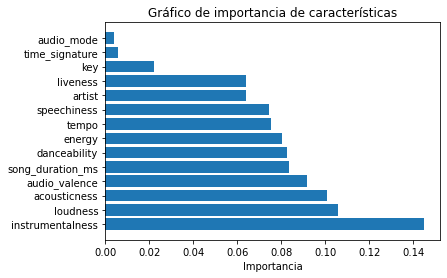

In [89]:
#Gráfico de importancia de características:


feature_names = ["song_duration_ms", "acousticness", "danceability", "energy", "instrumentalness", "key", "liveness", "loudness", "audio_mode", "speechiness", "tempo", "time_signature", "audio_valence", "artist"]

importancias = pd.DataFrame({"característica": feature_names, "importancia": forest.feature_importances_})

importancias = importancias.sort_values(by="importancia", ascending=False)

plt.barh(range(len(importancias)), importancias["importancia"])
plt.yticks(range(len(importancias)), importancias["característica"])
plt.xlabel("Importancia")
plt.title("Gráfico de importancia de características")
plt.show()


# Ponemos a prueba el metodo con datos actuales


### Dataframe test

In [87]:
dftest = pd.read_csv("song_data_2023.csv")

In [88]:
dftest.shape

(100, 16)

In [89]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         100 non-null    object 
 1   artist_name       100 non-null    object 
 2   song_popularity   100 non-null    int64  
 3   song_duration_ms  100 non-null    int64  
 4   acousticness      100 non-null    float64
 5   danceability      100 non-null    float64
 6   energy            100 non-null    float64
 7   instumentalness   100 non-null    float64
 8   key               100 non-null    int64  
 9   liveness          100 non-null    float64
 10  loudness          100 non-null    float64
 11  audio_mode        100 non-null    int64  
 12  speechiness       100 non-null    float64
 13  tempo             100 non-null    float64
 14  time_signature    100 non-null    int64  
 15  audio_valence     100 non-null    float64
dtypes: float64(9), int64(5), object(2)
memory usa

In [90]:
dftest = dftest[["song_name","song_popularity", "song_duration_ms", "acousticness", "danceability", "energy", "instumentalness", "key", "liveness", "loudness", "audio_mode", "speechiness", "tempo", "time_signature", "audio_valence", "artist_name"]]

In [91]:
dftest["artist"]= dftest["artist_name"]
dftest["instrumentalness"]=dftest["instumentalness"]

In [92]:
dftest.song_duration_ms= dftest.song_duration_ms.astype(float)
dftest.time_signature= dftest.time_signature.astype(float)
dftest.audio_mode= dftest.audio_mode.astype(float)

In [93]:
dftest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_name         100 non-null    object 
 1   song_popularity   100 non-null    int64  
 2   song_duration_ms  100 non-null    float64
 3   acousticness      100 non-null    float64
 4   danceability      100 non-null    float64
 5   energy            100 non-null    float64
 6   instumentalness   100 non-null    float64
 7   key               100 non-null    int64  
 8   liveness          100 non-null    float64
 9   loudness          100 non-null    float64
 10  audio_mode        100 non-null    float64
 11  speechiness       100 non-null    float64
 12  tempo             100 non-null    float64
 13  time_signature    100 non-null    float64
 14  audio_valence     100 non-null    float64
 15  artist_name       100 non-null    object 
 16  artist            100 non-null    object 
 17

In [94]:
dftest

song_name  song_popularity  \
0             Shakira: Bzrp Music Sessions, Vol. 53               98   
1                                           Flowers               98   
2                                       Los Angeles               63   
3                                   CORAZONES ROTOS               74   
4                                      VISTA AL MAR               37   
..                                              ...              ...   
95  All I Want For Christmas Is You (SuperFestive!)                0   
96                     Family Affair (Dance for Me)                0   
97                                          As I Am                0   
98                                            2step                0   
99                       Even My Dad Does Sometimes                0   

    song_duration_ms  acousticness  danceability  energy  instumentalness  \
0           218289.0        0.2740         0.778   0.632         0.000000   
1           200455.0        0.0632         0.707   0.681         0.000005   
2           163360.0        0.2910         0.776   0.665         0.000000   
3           230130.0        0.2380         0.788   0.782         0.000420   
4           180673.0        0.8030         0.759   0.561         0.121000   
..               ...           ...           ...     ...              ...   
95          239920.0        0.3150         0.562   0.937         0.000000   
96          158391.0        0.0784         0.869   0.726         0.000000   
97          174406.0        0.1270         0.595   0.543         0.000000   
98          153627.0        0.1690         0.763   0.661         0.000000   
99          228533.0        0.7560         0.584   0.318         0.000172   

    key  liveness  loudness  audio_mode  speechiness    tempo  time_signature  \
0     2    0.0915    -5.600         0.0       0.0493  122.104             4.0   
1     0    0.0322    -4.325         1.0       0.0668  117.999             4.0   
2    11    0.1620    -6.078         0.0       0.3960   98.211             4.0   
3     9    0.0773    -5.517         1.0       0.0513  123.042             4.0   
4     0    0.1010    -5.643         0.0       0.1310  104.915             4.0   
..  ...       ...       ...         ...          ...      ...             ...   
95    9    0.4480    -4.059         0.0       0.0596  150.001             4.0   
96   11    0.1070    -5.654         0.0       0.0459  124.023             4.0   
97   11    0.0975    -8.149         1.0       0.0380   99.928             4.0   
98    4    0.1170    -5.592         0.0       0.0560   95.002             4.0   
99    2    0.1170    -8.926         1.0       0.0278  129.771             3.0   

    audio_valence    artist_name         artist  instrumentalness  
0           0.498       Bizarrap       Bizarrap          0.000000  
1           0.646    Miley Cyrus    Miley Cyrus          0.000005  
2           0.872    Myke Towers    Myke Towers          0.000000  
3           0.525    Lola Indigo    Lola Indigo          0.000420  
4           0.491        Quevedo        Quevedo          0.121000  
..            ...            ...            ...               ...  
95          0.437  Justin Bieber  Justin Bieber          0.000000  
96          0.343   David Guetta   David Guetta          0.000000  
97          0.109  Justin Bieber  Justin Bieber          0.000000  
98          0.632     Ed Sheeran     Ed Sheeran          0.000000  
99          0.296     Ed Sheeran     Ed Sheeran          0.000172  

[100 rows x 18 columns]

In [96]:
X_train = df[['song_duration_ms', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature', 'audio_valence']]
y_train = df['song_popularity']
X_test = dftest[['song_duration_ms', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'audio_mode', 'speechiness', 'tempo', 'time_signature', 'audio_valence']]
y_test = dftest['song_popularity']

forest = RandomForestRegressor(max_depth = 8,
                             random_state = 0,
                             n_estimators = 100,
                             n_jobs = -1)


forest.fit(X_train, y_train)

y_pred = forest.predict(X_test)

for i, j in zip(y_pred[:5], y_test[:5]):
    print(f"Predicción:{i} \tValor real:{j}")


Predicción:56.84315679420871 	Valor real:98
Predicción:55.24282207642171 	Valor real:98
Predicción:51.33682477517389 	Valor real:63
Predicción:49.89786414424407 	Valor real:74
Predicción:46.074659533044425 	Valor real:37


In [70]:
RAE = np.sum(np.abs(np.subtract(y_test, y_pred))) / np.sum(np.abs(np.subtract(y_test, np.mean(y_test))))
RSE = np.sum(np.square(np.subtract(y_test, y_pred))) / np.sum(np.square(np.subtract(y_test, np.mean(y_test))))
r2_ajustada = 1 - (1 - forest.score(X_test, y_test))*(len(y_test) - 1)/(len(y_test) - X_test.shape[1] - 1)

C:\Users\Usuario ASUS\anaconda3\lib\site-packages\sklearn\base.py:493: FutureWarning:

The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- audio_valence
Feature names seen at fit time, yet now missing:
- song_popularity




In [99]:
print(f"RAE:\t {RAE}")
print(f"RSE:\t {RSE}")
print(f"Adjusted R**2:\t {r2_ajustada}")


RAE:	 0.67742855234603
RSE:	 1.2617756904730095
Adjusted R**2:	 -0.45250922507939473


In [100]:
print(f"MAE:\t {mean_absolute_error(y_pred, y_test)}")
print(f"MSE:\t {mean_squared_error(y_pred, y_test)}")
print(f"R**2:\t {r2_score(y_pred, y_test)}")

MAE:	 42.770522869668994
MSE:	 2104.4439532966608
R**2:	 -185.07616715311886


In [103]:
y_pred = np.array(y_pred)
y_test = np.array(y_test)


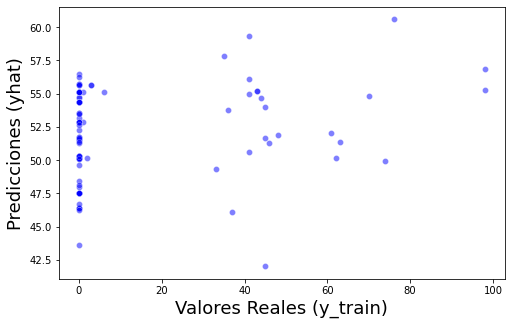

In [104]:
plt.figure(figsize = (8, 5))
sns.scatterplot(x = y_test.flatten(), y = y_pred.flatten(), alpha = 0.5, color = "blue")
plt.xlabel("Valores Reales (y_train)", size = 18)
plt.ylabel("Predicciones (yhat)", size = 18)
plt.show()

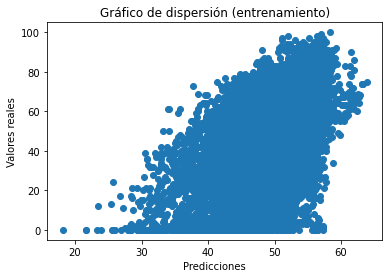

In [105]:
#Gráfico de dispersión:
import matplotlib.pyplot as plt

y_pred_train = forest.predict(X_train)

plt.scatter(y_pred_train, y_train)
plt.xlabel("Predicciones")
plt.ylabel("Valores reales")
plt.title("Gráfico de dispersión (entrenamiento)")
plt.show()
